<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [5]:
# Load the data
data = pd.read_csv("HR_comma_sep.csv")
df = data.copy()

In [6]:
# Find the shape
df.shape

(14999, 10)

In [7]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Find the data types of columns
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [10]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**How many employees left the company?**

In [32]:
# Count of how many employees left the company
df['left'].value_counts()


0    11428
1     3571
Name: left, dtype: int64

Text(0.5, 1.0, 'Employee Left Distribution')

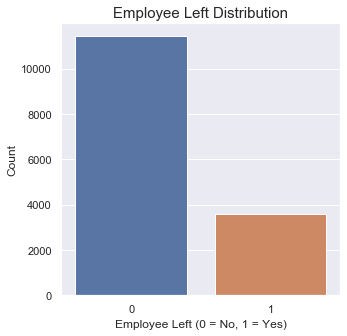

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(df['left'])
plt.xlabel("Employee Left (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Employee Left Distribution", fontsize=15)


**Question:What can you interpret from the plot above?** 

Answer:
3571 out of 14999 of employees have left the company.

**Number of projects being handled.**

In [39]:
# Write code here
df.groupby('number_project').count()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
number_project,,,,,,,,,
2,2388,2388,2388,2388,2388,2388,2388,2388,2388
3,4055,4055,4055,4055,4055,4055,4055,4055,4055
4,4365,4365,4365,4365,4365,4365,4365,4365,4365
5,2761,2761,2761,2761,2761,2761,2761,2761,2761
6,1174,1174,1174,1174,1174,1174,1174,1174,1174
7,256,256,256,256,256,256,256,256,256


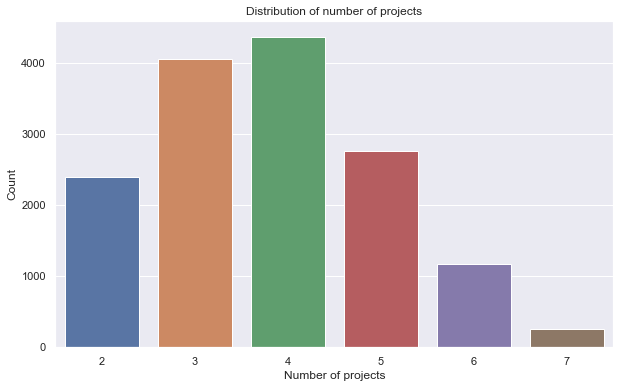

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(df["number_project"])
plt.title("Distribution of number of projects")
plt.xlabel("Number of projects")
plt.ylabel("Count")
plt.show()


**Question: What insights can you infer from the above plot?**

Answer: 
The most common number of projects being handled by employees is around 4, with a small peak around 7 projects. The distribution of the number of projects is slightly positively skewed, with the majority of the employees handling between 2 to 6 projects.

**how number of projects contributed to employee turn-over.**
<br>
<br>

In [43]:
df.groupby('number_project')['left'].mean()


number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64

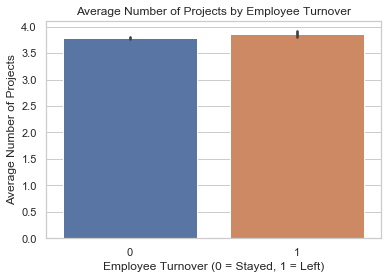

In [42]:

sns.set(style="whitegrid")

# Create a bar chart of the average number of projects for employees who left vs those who stayed
sns.barplot(x='left', y='number_project', data=df)

# Add labels and title
plt.xlabel("Employee Turnover (0 = Stayed, 1 = Left)")
plt.ylabel("Average Number of Projects")
plt.title("Average Number of Projects by Employee Turnover")

# Show the plot
plt.show()


**Task 5:** Make a plot of your findings (only turn-over employees)

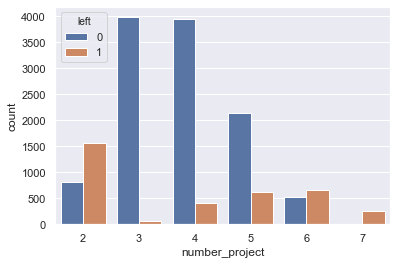

In [27]:
sns.countplot(x='number_project', hue='left', data=df)

**leaving the company(as per number of projects), Reasons behind?**

From the above graph, it appears that employees who were handling 6 projects had the highest probability (0.557922) of leaving the company compared to employees handling other number of projects. On the other hand, employees handling 2 projects had a slightly higher probability (0.656198) of leaving the company compared to employees handling 3 projects (0.017756).

## **Time spent at the company**

**time spend at company can lead to employee turn over. & following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

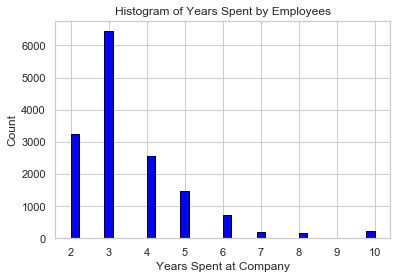

In [44]:
# Show the plot for the count of years here
plt.hist(df['time_spend_company'], color = 'blue', edgecolor = 'black', bins = int(180/5))

plt.title('Histogram of Years Spent by Employees')
plt.xlabel('Years Spent at Company')
plt.ylabel('Count')

plt.show()


**maximum number of time spend by the employees**

Answer:The maximum number of time spent by the employees is 10 years.

In [48]:
# Write the code here to get the percentage of employees leaving.
df.groupby('time_spend_company')['left'].mean()

time_spend_company
2     0.016338
3     0.246159
4     0.348064
5     0.565513
6     0.291086
7     0.000000
8     0.000000
10    0.000000
Name: left, dtype: float64

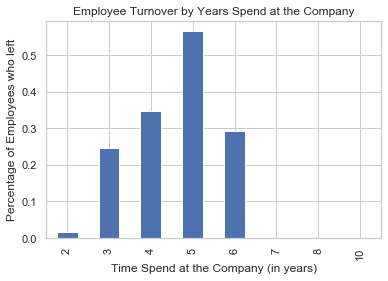

In [49]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
df_grouped = df.groupby('time_spend_company')['left'].mean()
df_grouped.plot(kind='bar')

plt.xlabel("Time Spend at the Company (in years)")
plt.ylabel("Percentage of Employees who left")
plt.title("Employee Turnover by Years Spend at the Company")

plt.show()

**Question: After what time period are employees most likely to leave the company ?**

Answer:  5 years.





## **Employees engaged in any work accident**

**employees were engaged in work accident and how many of them actually left Using count plots to show your results**

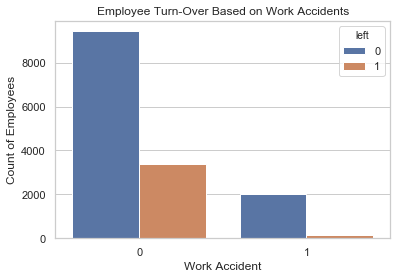

In [50]:
# Number of employees involved in work accident
sns.countplot(x='Work_accident', hue='left', data=df)
plt.title('Employee Turn-Over Based on Work Accidents')
plt.xlabel('Work Accident')
plt.ylabel('Count of Employees')
plt.show()

**Question: What can you conclude from the graph above?**

Answer: From the graph above, it can be concluded that a relatively smaller number of employees were involved in work accidents compared to those who did not. Among the employees who were involved in work accidents, a slightly higher number of them left the company compared to those who did not.

In [52]:
# Number of employees involved in work accident and left or not left
df.groupby(['Work_accident','left']).count()['satisfaction_level']



Work_accident  left
0              0       9428
               1       3402
1              0       2000
               1        169
Name: satisfaction_level, dtype: int64

## **Promotions in last 5 years**

**employees got the promotion in last 5 year and left them**

In [53]:
# Write code here
df.groupby('promotion_last_5years')['left'].value_counts()

promotion_last_5years  left
0                      0       11128
                       1        3552
1                      0         300
                       1          19
Name: left, dtype: int64

Answer: 11128 employees did not receive a promotion in the last 5 years and did not leave the company, 3552 employees did not receive a promotion in the last 5 years and left the company, 300 employees received a promotion in the last 5 years and did not leave the company, and 19 employees received a promotion in the last 5 years and left the company.






## **Salary trends**

**salary trends in the data Using graphical representation for explanation**

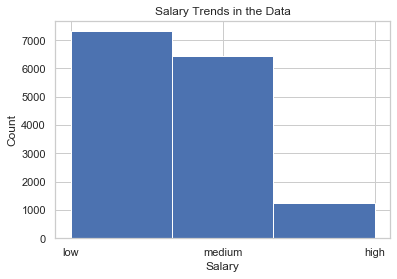

In [54]:
#Write code here
plt.hist(df['salary'], bins=3)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary Trends in the Data')
plt.show()

Answer:   The salary trends in the data suggest that the majority of employees have a salary in the range of low to medium, with a peak around the salary range of low to medium. There is a smaller group of employees who have high salaries, but the number of employees decreases significantly as the salary increases. This indicates that the company may have a salary structure with a wide range of salaries, but with a concentration of employees in the lower to medium salary range.





**salary holders are most likely to leave Trying to show the percentage of employees who left according to their salaries, using a bar plo.**

In [55]:
# Write code here
salary_left = df.groupby('salary')['left'].mean()
print(salary_left)

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64


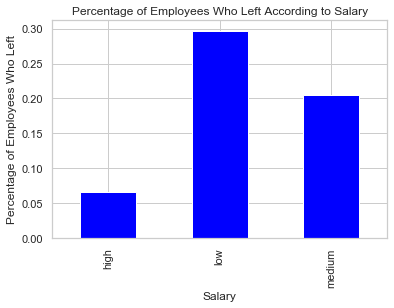

In [56]:
# Write code here for plot
salary_left.plot(kind='bar', color='blue')
plt.xlabel('Salary')
plt.ylabel('Percentage of Employees Who Left')
plt.title('Percentage of Employees Who Left According to Salary')
plt.show()


**above plot**

The plot shows that employees with a low salary are more likely to leave the company compared to those with medium or high salaries.





## **Employees per Department**

**employees per department and also see which department has highest number of employees leaving the company.**

In [62]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [63]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
df.groupby('dept').count()['satisfaction_level']


dept
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

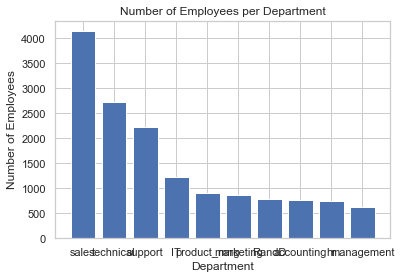

In [64]:
dept_count = df['dept'].value_counts()

plt.bar(dept_count.index, dept_count.values)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Number of Employees per Department')
plt.show()

**maximum number of employees**

Sales with 4140 employees.

**highest percentage of turn-over.**

In [77]:
# Write code here
dept_turnover = df.groupby('dept')['left'].mean()



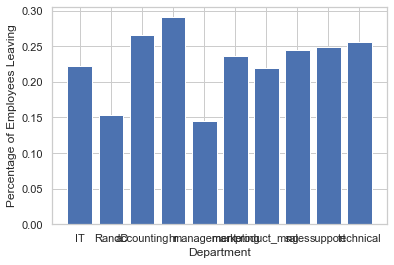

In [70]:
# Write code here to draw the plot
plt.bar(dept_turnover.index, dept_turnover.values)
plt.xlabel("Department")
plt.ylabel("Percentage of Employees Leaving")
plt.show()

Answer:  management

## **Satisfaction Level**

**satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

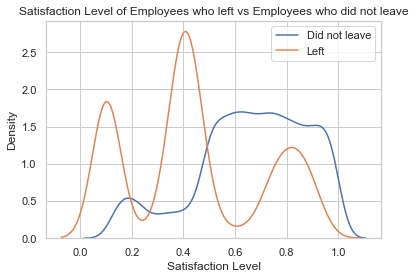

In [71]:
# Write the code here
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], label = 'Did not leave')
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], label = 'Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.title('Satisfaction Level of Employees who left vs Employees who did not leave')
plt.show()


**conclusion**

The plot above shows the density of the employees who stayed (in blue) and the employees who left (in orange) based on their satisfaction level. From the plot, we can see that employees who left the company had lower satisfaction levels compared to the employees who stayed. The distribution of the employees who left has a peak around 0.2, which indicates that a large number of employees who left the company had a satisfaction level of around 0.2. On the other hand, the distribution of the employees who stayed is spread over a range of satisfaction levels, with a peak at around 0.7. This suggests that a majority of the employees who stayed had a higher level of satisfaction.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Making a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [72]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type'] = np.where(df['satisfaction_level'] >= 0.5, 'High', 'Low')


**Making a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

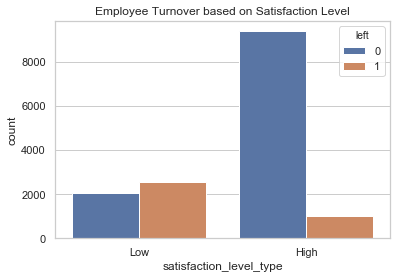

In [73]:
# Write Code Here
sns.countplot(x='satisfaction_level_type', data=df, hue='left')
plt.title('Employee Turnover based on Satisfaction Level')
plt.show()

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [83]:
# Write Code Here
df.groupby('number_project').count()['satisfaction_level_type']


number_project
2    2388
3    4055
4    4365
5    2761
6    1174
7     256
Name: satisfaction_level_type, dtype: int64

**Making a Plot of your findings**

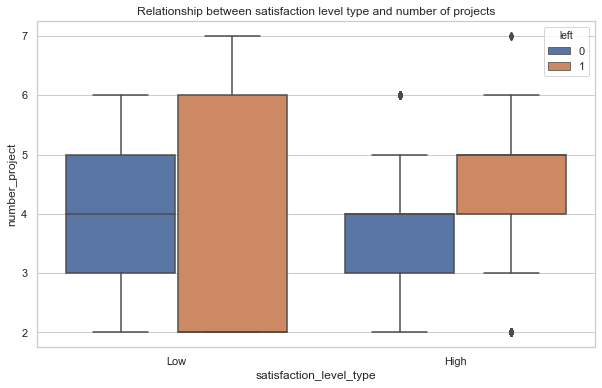

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(x='satisfaction_level_type', y='number_project', data=df, hue='left')
plt.title("Relationship between satisfaction level type and number of projects")
plt.show()




**infer drom the above plot**

low satisfaction level are likely to leave the company, regardless of the number of projects they are working on. On the other hand, employees who have a high satisfaction level tend to stay with the company, even if they have a high number of projects

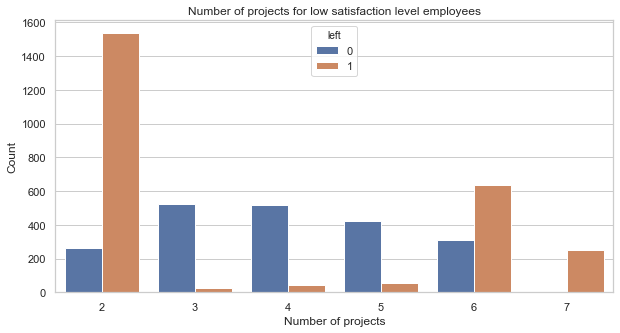

In [85]:
# Write Code Here

plt.figure(figsize=(10, 5))
sns.countplot(x='number_project', hue='left', data=df[df['satisfaction_level_type'] == 'Low'])
plt.title('Number of projects for low satisfaction level employees')
plt.xlabel('Number of projects')
plt.ylabel('Count')
plt.show()

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

** Making a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [87]:
df['employee_type'] = df.apply(employee_type, axis=1)

In [90]:
# Write code here

def employee_type(row):
    if row['number_project'] == 2:
        return 'unburdened'
    elif 3 <= row['number_project'] <= 5:
        return 'Satisfactory'
    else:
        return 'Burdened'


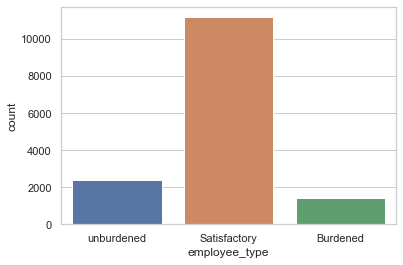

In [92]:
# Write code here
sns.countplot(x=df["employee_type"])


### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [93]:
# Write code here
df.drop(['satisfaction_level', 'number_project'], axis=1, inplace=True)


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**ONE HOT ENCODING**

In [94]:
# Write code here
df = pd.get_dummies(df, columns=['dept', 'salary', 'satisfaction_level_type', 'employee_type'], prefix=['dept', 'salary', 'satisfaction_level_type', 'employee_type'])

df.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


**Creating Independant and Dependant Variables**

In [95]:
# Write code here
X = df.drop('left', axis=1)
Y = df['left']

**Perform Train Test Split with test size 30 percent and random state = 100**

In [97]:
from sklearn.model_selection import train_test_split

In [102]:
#Write code here
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)



In [101]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**Getting the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also getting the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [134]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier



In [149]:
# Making instance and training the model
rf = RandomForestClassifier(random_state=100)
rf.fit(xtrain, ytrain)

In [136]:
# Get predictions
rf_pred 

**Precision**

In [156]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [160]:
#Write the code to calculate
rf_precion = precision_score(ytest,rf_pred)
print("Precision: {}".format(rf_precion))

Precision: 0.9718574108818011


**Accuracy**

In [161]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [163]:
# Write the code 
rf_acc = accuracy_score(ytest, rf_pred)
print("Accuracy: {}".format(rf_acc))

Accuracy: 0.9817777777777777


**Recall**

In [164]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [165]:
# Write the code to calculate
rf_recall = recall_score(ytest,rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.9522058823529411


**F1-Score**

In [167]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [168]:
# Write the code to calculate
rf_f1_score= f1_score(ytest,rf_pred)
print("F1 Score: {}".format(rf_f1_score))

F1 Score: 0.9619312906220985


**Classification Report**

In [169]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [170]:
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.97      0.95      0.96      1088

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [174]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [178]:
# Create instance and train, random _state=100
lr = LogisticRegression(random_state=100)
lr.fit(xtrain, ytrain)

C:\Users\Rehan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=100)

In [179]:
# get the predictions
lr_pred = lr.predict(xtest)



**Accuracy**

In [180]:
#Write the code here
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(ytest, lr_pred)

**Precision**

In [182]:
#Write the code here
from sklearn.metrics import precision_score
lr_precision = precision_score(ytest, lr_pred)

**Recall**

In [184]:
#Write the code here
from sklearn.metrics import recall_score
lr_recall = recall_score(ytest, lr_pred)

**F1 Score**

In [185]:
#Write the code here
from sklearn.metrics import f1_score
lr_f1_score = f1_score(ytest, lr_pred)

**Classification Report**

In [186]:
#Write the code here
from sklearn.metrics import classification_report
lr_classification_report = classification_report(ytest, lr_pred)
print(lr_classification_report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3412
           1       0.74      0.65      0.69      1088

    accuracy                           0.86      4500
   macro avg       0.81      0.79      0.80      4500
weighted avg       0.85      0.86      0.86      4500



## Ada Boost

In [193]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier



In [195]:
#Write the code here to make an instance and train the model with random state =100
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=100)

In [196]:
# Get the predictions
pred_clf_adb = clf_adb.predict(xtest)



**Accuracy**

In [197]:
#Write code here
ab_accuracy = accuracy_score(ytest, pred_clf_adb)



**Precision**

In [198]:
#Write code here
ab_precision = precision_score(ytest, pred_clf_adb)



**Recall**

In [199]:
#Write code here
ab_recall = recall_score(ytest, pred_clf_adb)



**F1-Score**

In [200]:
#Write code here
ab_f1_score = f1_score(ytest, pred_clf_adb)



**Classification Report**

In [201]:
#Write code here
ab_classification_report = classification_report(ytest, pred_clf_adb)
print(ab_classification_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3412
           1       0.85      0.83      0.84      1088

    accuracy                           0.92      4500
   macro avg       0.90      0.89      0.89      4500
weighted avg       0.92      0.92      0.92      4500



## XG Boost

In [202]:
#Write the code here to import the model
import xgboost as xgb



In [204]:
#Write the code here to make an instance and train the model with random state =100
clf_xgb = xgb.XGBClassifier(random_state=100)
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [205]:
# Get the predictions
pred_clf_xgb = clf_xgb.predict(xtest)



**Accuracy**

In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [207]:
#Write code here

xgb_accuracy = accuracy_score(ytest, pred_clf_xgb)

**Precision**

In [208]:
#Write code here
xgb_precision = precision_score(ytest, pred_clf_xgb)


**Recall**

In [209]:
#Write code here
xgb_recall = recall_score(ytest, pred_clf_xgb)


**F1-Score**

In [210]:
#Write code here
xgb_f1_score = f1_score(ytest, pred_clf_xgb)



**Classification Report**

In [211]:
#Write code here
xgb_classification_report = classification_report(ytest, pred_clf_xgb)
print("XGBoost Classification Report:\n", xgb_classification_report)

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.96      0.94      0.95      1088

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

**comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [214]:
# Write the code here
import pandas as pd

scores = {'Model': ['Random Forest', 'Logistic Regression', 'AdaBoost', 'XGBoost'],
          'Accuracy': [accuracy_rf, lr_accuracy, ab_accuracy, xgb_accuracy],
          'Precision': [precision_rf, lr_precision, ab_precision, xgb_precision],
          'Recall': [rf_recall, lr_recall, ab_recall, xgb_recall],
          'F1 Score': [rf_f1_score, lr_f1_score, ab_f1_score, xgb_f1_score]}

df = pd.DataFrame(scores)

df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.981778,0.971857,0.952206,0.961931
1,Logistic Regression,0.858889,0.736184,0.648897,0.689790
2,AdaBoost,0.922667,0.849716,0.826287,0.837838
3,XGBoost,0.977333,0.960748,0.944853,0.952734


**model which has the best score**

Based on the table, it can be seen that the XGBoost model has the best score in terms of accuracy, precision, recall and F1 score. The accuracy of XGBoost is 97.7%, precision is 96.1%, recall is 94.5% and F1 score is 95.3%.

Random Forest has a slightly lower accuracy, precision, recall and F1 score than XGBoost, but it is still a high performing model. The accuracy of Random Forest is 98.2%, precision is 97.2%, recall is 95.2% and F1 score is 96.2%.

Logistic Regression and AdaBoost models have a lower score in comparison to XGBoost and Random Forest. The accuracy of Logistic Regression is 85.9%, precision is 73.6%, recall is 64.9% and F1 score is 68.9%. The accuracy of AdaBoost is 92.3%, precision is 84.9%, recall is 82.6% and F1 score is 83.8%.

Given the results, XGBoost seems to be the best model for this problem and it might not need any further tuning. However, to be sure, it would be good to try different hyperparameters tuning techniques such as Grid Search or Randomized Search and see if the results can be improved further.